In [7]:
import zipfile
import os
import pandas as pd
import deflatebr as dbr

In [2]:
def concatenar_csvs(diretorio):
    frames = []

    for arquivo in os.listdir(diretorio):
        if arquivo.endswith('.csv'):
            caminho_arquivo = os.path.join(diretorio, arquivo)
            
            df = pd.read_csv(caminho_arquivo, encoding='utf-8', delimiter=";", decimal=",")
            df = df.rename(columns={df.columns[0]: "data_base"})
            df = df.rename(columns={df.columns[6]: "cnae_secao"})
            df = df.rename(columns={df.columns[7]: "cnae_subclasse"})
            df['data_base'] = pd.to_datetime(df['data_base'], format="%Y-%m-%d")
            df['mes'] = df['data_base'].dt.month #cria uma nova coluna com mês
            df['ano'] = df['data_base'].dt.year
            #Filtros:
            df = df[df['mes'] == 12] #trocar para o ano que você quer filtrar
            df = df[df['cliente'] == 'PJ']
            df = df[df['cnae_secao'] == "PJ - Agricultura, pecuária, produção florestal, pesca e aqüicultura"]
            df = df[['data_base', 'cnae_secao', 'cnae_subclasse','carteira_ativa']]
            df['data_base'] = df['data_base'].dt.strftime('%Y-%m')
            #Agrupamentos para análise
            df = df.groupby(['data_base', 'cnae_secao', 'cnae_subclasse'])['carteira_ativa'].sum().reset_index()
            frames.append(df)

    df_concatenado = pd.concat(frames, ignore_index=True)

    return df_concatenado

In [3]:
anos = list(range(2012, 2024))
dataframes = []

for ano in anos:
    diretorio = f"planilha_{ano}"
    dataframe_ano = concatenar_csvs(diretorio)
    dataframes.append(dataframe_ano)

df_total = pd.concat(dataframes, ignore_index=False)

In [5]:
df_total.to_csv("pj_cnaesecao_cnaesubclasse_endividamento.csv")

In [6]:
#pip install deflateBR

In [8]:
df_total['valor_deflacionado'] = dbr.deflate(nominal_values=df_total['carteira_ativa'], nominal_dates=df_total['data_base'], real_date='2022-12')

/Users/brunamoura/anaconda3/lib/python3.11/site-packages/deflatebr/deflate.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['deflated'] = df[['nom_values', 'VALVALOR']].apply(lambda x: ((real_indx/x[1]) * x[0])[0], axis=1)


In [9]:

df_total.head(3)

,data_base,cnae_secao,cnae_subclasse,carteira_ativa,valor_deflacionado
0,2012-12,"PJ - Agricultura, pecuária, produção florestal...",-,1035943645.68,1876435249.39
1,2012-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Apicultura,6502447.56,11778074.86
2,2012-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Atividades de apoio à agricultura não esp...,1895589256.99,3433536674.52


In [15]:
#df_total['data_base'].unique()

In [41]:
df_total_2022 = df_total[df_total['data_base'] == '2022-12']

In [42]:
df_total_2022.head(5)

,data_base,cnae_secao,cnae_subclasse,carteira_ativa,valor_deflacionado
0,2022-12,"PJ - Agricultura, pecuária, produção florestal...",-,1982559149.06,1994850387.20
1,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Apicultura,13954409.63,14040922.55
2,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Atividades de apoio à agricultura não esp...,2695161261.95,2711870407.26
3,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Atividades de apoio à aquicultura em água...,191618.31,192806.28
4,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Atividades de apoio à aquicultura em água...,105089.20,105740.72


In [43]:
soma_valor_deflacionado = df_total_2022['valor_deflacionado'].sum()

df_total_2022['perc'] = df_total_2022['valor_deflacionado']/soma_valor_deflacionado * 100

/var/folders/cj/_95ntbkj60b_pjvf32tvsh2h0000gn/T/ipykernel_71656/3974703803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_2022['perc'] = df_total_2022['valor_deflacionado']/soma_valor_deflacionado * 100


In [45]:
df_total_2022 = df_total_2022.sort_values(by='perc', ascending=False)
df_total_2022['cumperc'] = df_total_2022['perc'].cumsum()

In [50]:
df_total_2022.head(13)

,data_base,cnae_secao,cnae_subclasse,carteira_ativa,valor_deflacionado,perc,cumperc
73,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Cultivo de soja,13473296116.68,13556826280.82,33.80,33.80
16,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Criação de bovinos para corte,3625061593.29,3647535825.82,9.09,42.89
44,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Cultivo de cana-de-açúcar,3020758833.99,3039486581.01,7.58,50.47
2,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Atividades de apoio à agricultura não esp...,2695161261.95,2711870407.26,6.76,57.23
0,2022-12,"PJ - Agricultura, pecuária, produção florestal...",-,1982559149.06,1994850387.20,4.97,62.21
90,2022-12,"PJ - Agricultura, pecuária, produção florestal...","PJ - Produção de sementes certificadas, exceto...",1380740915.28,1389301071.18,3.46,65.67
8,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Atividades de pós-colheita,1341524271.74,1349841296.89,3.37,69.04
86,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Produção de ovos,1177071670.65,1184369141.81,2.95,71.99
95,2022-12,"PJ - Agricultura, pecuária, produção florestal...","PJ - Serviço de preparação de terreno, cultivo...",1163981355.72,1171197671.08,2.92,74.91
56,2022-12,"PJ - Agricultura, pecuária, produção florestal...",PJ - Cultivo de laranja,767043428.33,771798854.39,1.92,76.83


In [100]:
df_acumulado_corte = df_total_2022[df_total_2022['cumperc'] < 81]

In [71]:
df_acumulado_corte['cnae_secao'] = df_acumulado_corte['cnae_secao'].str.replace("PJ - ", "")
df_acumulado_corte['cnae_subclasse'] = df_acumulado_corte['cnae_subclasse'].str.replace("PJ - ", "")
df_acumulado_corte['cnae_subclasse'] = df_acumulado_corte['cnae_subclasse'].str.replace("-", "Indisponível")

/var/folders/cj/_95ntbkj60b_pjvf32tvsh2h0000gn/T/ipykernel_71656/653510863.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cj/_95ntbkj60b_pjvf32tvsh2h0000gn/T/ipykernel_71656/653510863.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cj/_95ntbkj60b_pjvf32tvsh2h0000gn/T/ipykernel_71656/653510863.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [78]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_acumulado_corte.to_csv("pj_cnaesecao_cnaesubclasse_endividamento.csv")

In [73]:
df_acumulado_corte.head(5)

,data_base,cnae_secao,cnae_subclasse,carteira_ativa,valor_deflacionado,perc,cumperc
73,2022-12,"Agricultura, pecuária, produção florestal, pes...",Cultivo de soja,13473296116.68,13556826280.82,33.80,33.80
16,2022-12,"Agricultura, pecuária, produção florestal, pes...",Criação de bovinos para corte,3625061593.29,3647535825.82,9.09,42.89
44,2022-12,"Agricultura, pecuária, produção florestal, pes...",Cultivo de canaIndisponíveldeIndisponívelaçúcar,3020758833.99,3039486581.01,7.58,50.47
2,2022-12,"Agricultura, pecuária, produção florestal, pes...",Atividades de apoio à agricultura não especifi...,2695161261.95,2711870407.26,6.76,57.23
0,2022-12,"Agricultura, pecuária, produção florestal, pes...",Indisponível,1982559149.06,1994850387.20,4.97,62.21


In [35]:
import plotly.express as px
import numpy as np

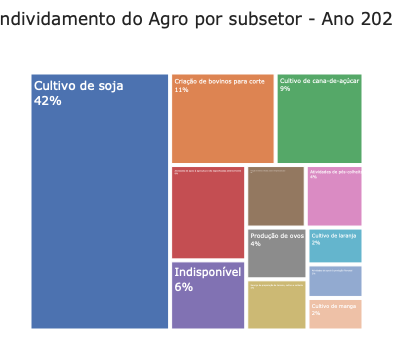

In [106]:
fig = px.treemap(df_acumulado_corte, 
                 path=['cnae_secao', 'cnae_subclasse'],
                 values='valor_deflacionado')

fig.update_layout(title='Endividamento do Agro por subsetor - Ano 2022',
                  margin=dict(t=50, l=25, r=25, b=25),
                 template = "seaborn")

fig.update_traces(textinfo='label+percent entry',
                 marker_line_width = 1,
                  hovertemplate='%{label} <br> $%{value:,.2f} <br> %{percentRoot}',
                 textposition="top left",
                 textfont_size = 12,
                 textfont_color = 'white')

fig.show()